In [1]:
import pandas as pd
import numpy as np
import math

def reject_outliers(data, col):
 u = np.mean(data[col])
 s = np.std(data[col])
 data_filtered = data[(data[col]>(u-2*s)) & (data[col]<(u+2*s))]
 return data_filtered


df = pd.read_csv ('ttest_new.csv')
df = df.rename(columns=lambda x: x.strip())
list(df.columns)

df['class'] = np.where(df['Rank']== 0, 0, 1)
df = df[df['Year'] > 2011]
df['LogSize'] = df['LogSize'] - math.log(1000000)
df

,Name,Year,Rank,Fog,Flesch,WPS,ComplexWord,Pos,Neg,Uncertainty,LogSize,class
2,MMM,2012,29,30.333,4.166,17.368,0.324,0.004,0.015,0.010,1.569489,1
3,MMM,2013,29,30.168,3.834,17.214,0.324,0.005,0.014,0.011,1.584489,1
4,MMM,2014,29,30.315,4.059,17.361,0.324,0.004,0.012,0.011,1.558489,1
5,MMM,2015,29,30.541,4.568,17.462,0.327,0.004,0.012,0.010,2.089489,1
6,MMM,2016,29,30.546,5.347,17.545,0.325,0.004,0.015,0.011,2.150489,1
...,...,...,...,...,...,...,...,...,...,...,...,...
869,WFC,2016,0,32.109,11.765,18.619,0.337,0.002,0.007,0.007,-0.266511,0
870,WFC,2017,0,30.826,14.342,17.690,0.328,0.002,0.007,0.007,-0.669511,0
871,WFC,2018,0,30.646,13.534,17.253,0.335,0.002,0.007,0.007,-0.910511,0
872,WFC,2019,0,63.260,-143.875,50.932,0.308,0.001,0.002,0.002,1.279489,0


In [2]:
def correlation(col):
    print("ttest between col and reputation group\n")
    summary, results =  rp.ttest(group1= df[col][df['class'] == 1], group1_name= "1", group2= df[col][df['class'] == 0], group2_name= "0")
    print(summary)
    print(results)

In [3]:
import pandas as pd
import researchpy as rp
import scipy.stats as stats

#for col in ['Pos', "Neg", 'Uncertainty', 'Fog', 'Flesch', 'LogSize' , 'WPS', 'ComplexWord']:
correlation("Pos")

ttest between col and reputation group

   Variable      N      Mean        SD        SE  95% Conf.  Interval
0         1  247.0  0.004603  0.001553  0.000099   0.004409  0.004798
1         0  490.0  0.004276  0.001635  0.000074   0.004130  0.004421
2  combined  737.0  0.004385  0.001615  0.000059   0.004269  0.004502
          Independent t-test   results
0      Difference (1 - 0) =     0.0003
1      Degrees of freedom =   735.0000
2                       t =     2.6115
3   Two side test p value =     0.0092
4  Difference < 0 p value =     0.9954
5  Difference > 0 p value =     0.0046
6               Cohen's d =     0.2038
7               Hedge's g =     0.2036
8           Glass's delta =     0.2111
9             Pearson's r =     0.0959


In [4]:
correlation("Neg")

ttest between col and reputation group

   Variable      N      Mean        SD        SE  95% Conf.  Interval
0         1  247.0  0.012960  0.003221  0.000205   0.012556  0.013363
1         0  490.0  0.013171  0.003869  0.000175   0.012828  0.013515
2  combined  737.0  0.013100  0.003664  0.000135   0.012835  0.013365
          Independent t-test   results
0      Difference (1 - 0) =    -0.0002
1      Degrees of freedom =   735.0000
2                       t =    -0.7410
3   Two side test p value =     0.4589
4  Difference < 0 p value =     0.2295
5  Difference > 0 p value =     0.7705
6               Cohen's d =    -0.0578
7               Hedge's g =    -0.0578
8           Glass's delta =    -0.0658
9             Pearson's r =     0.0273


In [5]:
correlation("Uncertainty")

ttest between col and reputation group

   Variable      N      Mean        SD        SE  95% Conf.  Interval
0         1  247.0  0.012725  0.002718  0.000173   0.012384  0.013065
1         0  490.0  0.012147  0.003383  0.000153   0.011847  0.012447
2  combined  737.0  0.012341  0.003185  0.000117   0.012110  0.012571
          Independent t-test   results
0      Difference (1 - 0) =     0.0006
1      Degrees of freedom =   735.0000
2                       t =     2.3314
3   Two side test p value =     0.0200
4  Difference < 0 p value =     0.9900
5  Difference > 0 p value =     0.0100
6               Cohen's d =     0.1819
7               Hedge's g =     0.1817
8           Glass's delta =     0.2126
9             Pearson's r =     0.0857


In [6]:
correlation("Flesch")

ttest between col and reputation group

   Variable      N      Mean         SD        SE  95% Conf.  Interval
0         1  247.0  7.893644   6.281673  0.399693   7.106386  8.680901
1         0  490.0  6.358645  13.230969  0.597714   5.184240  7.533050
2  combined  737.0  6.873088  11.402802  0.420028   6.048493  7.697683
          Independent t-test   results
0      Difference (1 - 0) =     1.5350
1      Degrees of freedom =   735.0000
2                       t =     1.7274
3   Two side test p value =     0.0845
4  Difference < 0 p value =     0.9577
5  Difference > 0 p value =     0.0423
6               Cohen's d =     0.1348
7               Hedge's g =     0.1347
8           Glass's delta =     0.2444
9             Pearson's r =     0.0636


In [7]:
correlation("Fog")

ttest between col and reputation group

   Variable      N       Mean        SD        SE  95% Conf.   Interval
0         1  247.0  31.608692  2.912919  0.185345  31.243628  31.973757
1         0  490.0  31.945908  3.953919  0.178620  31.594951  32.296865
2  combined  737.0  31.832893  3.639827  0.134075  31.569678  32.096107
          Independent t-test   results
0      Difference (1 - 0) =    -0.3372
1      Degrees of freedom =   735.0000
2                       t =    -1.1876
3   Two side test p value =     0.2354
4  Difference < 0 p value =     0.1177
5  Difference > 0 p value =     0.8823
6               Cohen's d =    -0.0927
7               Hedge's g =    -0.0926
8           Glass's delta =    -0.1158
9             Pearson's r =     0.0438


In [8]:
correlation("LogSize")

ttest between col and reputation group

   Variable      N      Mean        SD        SE  95% Conf.  Interval
0         1  247.0  1.072469  0.933873  0.059421   0.955431  1.189508
1         0  490.0  1.139108  1.221085  0.055163   1.030722  1.247494
2  combined  737.0  1.116774  1.132759  0.041726   1.034859  1.198690
          Independent t-test   results
0      Difference (1 - 0) =    -0.0666
1      Degrees of freedom =   735.0000
2                       t =    -0.7537
3   Two side test p value =     0.4513
4  Difference < 0 p value =     0.2256
5  Difference > 0 p value =     0.7744
6               Cohen's d =    -0.0588
7               Hedge's g =    -0.0588
8           Glass's delta =    -0.0714
9             Pearson's r =     0.0278


In [9]:
correlation("WPS")

ttest between col and reputation group

   Variable      N       Mean        SD        SE  95% Conf.   Interval
0         1  247.0  18.949579  2.930327  0.186452  18.582332  19.316825
1         0  490.0  19.268473  3.903765  0.176354  18.921968  19.614979
2  combined  737.0  19.161598  3.608021  0.132903  18.900684  19.422513
          Independent t-test   results
0      Difference (1 - 0) =    -0.3189
1      Degrees of freedom =   735.0000
2                       t =    -1.1329
3   Two side test p value =     0.2576
4  Difference < 0 p value =     0.1288
5  Difference > 0 p value =     0.8712
6               Cohen's d =    -0.0884
7               Hedge's g =    -0.0883
8           Glass's delta =    -0.1088
9             Pearson's r =     0.0417


In [10]:
correlation("ComplexWord")

ttest between col and reputation group

   Variable      N      Mean        SD        SE  95% Conf.  Interval
0         1  247.0  0.316478  0.012729  0.000810   0.314882  0.318073
1         0  490.0  0.316908  0.018139  0.000819   0.315298  0.318518
2  combined  737.0  0.316764  0.016517  0.000608   0.315570  0.317958
          Independent t-test   results
0      Difference (1 - 0) =    -0.0004
1      Degrees of freedom =   735.0000
2                       t =    -0.3338
3   Two side test p value =     0.7387
4  Difference < 0 p value =     0.3693
5  Difference > 0 p value =     0.6307
6               Cohen's d =    -0.0260
7               Hedge's g =    -0.0260
8           Glass's delta =    -0.0338
9             Pearson's r =     0.0123


In [11]:
import csv
def get_industry():
    industry_dic = {}
    csvfile = open('SandP_100_101021.csv')
    dicreader = csv.reader(csvfile)
    lineno = 0
    for row in dicreader:
        lineno += 1
        if lineno < 2:
            continue
        
        if (row[0]==''):
            break
            
        industry = row[5].strip()
        try:
            if (industry_dic[row[2]] != industry):
                print("error", row, industry)
        except:    
            industry_dic[row[2]] = industry
    return industry_dic

dic = get_industry()
print(len(dic))

96


In [12]:
def get_industry2():
    csvfile = open('industry.tsv')
    dicreader = csv.reader(csvfile, delimiter = '\t')
    lineno = 0
    industry_dic = {}
    for row in dicreader:
        lineno += 1
        if lineno < 2:
            continue
        
        if (row[0]==''):
            break
            
        industry = row[4].strip()
        try:
            if (industry_dic[row[0]] != industry):
                print("error", row, industry)
        except:    
            industry_dic[row[0]] = industry
    return industry_dic

industry12_dic = get_industry2()
print(industry12_dic)

{'General Industrials': 'Hlth Healthcare, Medical Equipment, and Drugs', 'Pharmaceuticals & Biotechnology': 'Hlth Healthcare, Medical Equipment, and Drugs', 'Financial Services': 'Money Finance', 'Life Insurance': 'Money Finance', 'Software & Computer Services': 'Other', 'Tobacco': 'NoDur Consumer', 'Retailers': 'Shops Wholesale, Retail, and Some Services', 'Electricity': 'Utils Utilities', 'Technology Hardware & Equipment': 'BusEq Business Equipment', 'Telecomms': 'Telcm Telephone and Television Transmission', 'Banks': 'Money Finance', 'Health Care Equipment & Services': 'Hlth Healthcare, Medical Equipment, and Drugs', 'Aerospace & Defence': 'Manuf Manufacturing', 'Electronic & Electrical equipment': 'BusEq Business Equipment', 'Oil & Gas Producers': 'Enrgy Oil, Gas, and Coal Extraction and Products', 'Beverages': 'NoDur Consumer', 'Household Goods': 'Durbl Consumer', 'Media': 'Telcm Telephone and Television Transmission', 'Chemical and Allied Products': 'Chems Chemicals and Allied Pr

In [13]:
df['industry'] = df.apply(lambda x: industry12_dic[dic[x['Name']]], axis=1)

In [14]:
df

,Name,Year,Rank,Fog,Flesch,WPS,ComplexWord,Pos,Neg,Uncertainty,LogSize,class,industry
2,MMM,2012,29,30.333,4.166,17.368,0.324,0.004,0.015,0.010,1.569489,1,"Hlth Healthcare, Medical Equipment, and Drugs"
3,MMM,2013,29,30.168,3.834,17.214,0.324,0.005,0.014,0.011,1.584489,1,"Hlth Healthcare, Medical Equipment, and Drugs"
4,MMM,2014,29,30.315,4.059,17.361,0.324,0.004,0.012,0.011,1.558489,1,"Hlth Healthcare, Medical Equipment, and Drugs"
5,MMM,2015,29,30.541,4.568,17.462,0.327,0.004,0.012,0.010,2.089489,1,"Hlth Healthcare, Medical Equipment, and Drugs"
6,MMM,2016,29,30.546,5.347,17.545,0.325,0.004,0.015,0.011,2.150489,1,"Hlth Healthcare, Medical Equipment, and Drugs"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,WFC,2016,0,32.109,11.765,18.619,0.337,0.002,0.007,0.007,-0.266511,0,Money Finance
870,WFC,2017,0,30.826,14.342,17.690,0.328,0.002,0.007,0.007,-0.669511,0,Money Finance
871,WFC,2018,0,30.646,13.534,17.253,0.335,0.002,0.007,0.007,-0.910511,0,Money Finance
872,WFC,2019,0,63.260,-143.875,50.932,0.308,0.001,0.002,0.002,1.279489,0,Money Finance


In [15]:
len(df.industry.unique())

12

In [16]:
df[['Fog','Flesch','WPS','ComplexWord','LogSize', 'industry']].groupby('industry').mean().to_csv('industry_mean.csv')
df[['Fog','Flesch','WPS','ComplexWord','LogSize', 'industry']].groupby('industry').mean()

,Fog,Flesch,WPS,ComplexWord,LogSize
industry,,,,,
BusEq Business Equipment,33.193775,4.988050,20.332963,0.321425,0.855652
Chems Chemicals and Allied Products,34.892778,1.924000,21.481778,0.335444,1.727823
Durbl Consumer,33.477947,7.301342,21.028737,0.311263,1.198647
"Enrgy Oil, Gas, and Coal Extraction and Products",30.722533,6.468033,18.170367,0.313783,1.650723
"Hlth Healthcare, Medical Equipment, and Drugs",30.826500,7.060536,18.110000,0.317879,1.151068
Manuf Manufacturing,31.354630,11.675370,19.015667,0.308519,0.599489
Money Finance,31.821577,4.895441,19.238180,0.314586,1.091697
NoDur Consumer,31.454189,6.579838,18.770595,0.317054,1.386084
Other,31.884468,7.560831,19.238000,0.316169,1.080502


In [17]:
df[['Fog','Flesch','WPS','ComplexWord','LogSize']].describe().T

,count,mean,std,min,25%,50%,75%,max
Fog,737.0,31.832893,3.639827,21.194000,30.168000,32.163000,34.047000,63.260000
Flesch,737.0,6.873088,11.402802,-143.875000,3.764000,8.073000,11.791000,36.249000
WPS,737.0,19.161598,3.608021,9.684000,17.362000,19.425000,21.059000,50.932000
ComplexWord,737.0,0.316764,0.016517,0.128000,0.308000,0.318000,0.327000,0.361000
LogSize,737.0,1.116774,1.132759,-3.309511,0.780489,1.251489,1.732489,3.326489


In [18]:
df[['Fog','Flesch','WPS','ComplexWord','LogSize']].describe().T.to_csv('meanmedian.csv')

In [19]:
df[['Year','Fog','Flesch','WPS','ComplexWord','LogSize']].groupby('Year').mean()

,Fog,Flesch,WPS,ComplexWord,LogSize
Year,,,,,
2012,31.124589,9.926795,18.516233,0.315178,0.618352
2013,31.354800,9.571267,18.597240,0.318880,0.804716
2014,31.361800,8.901453,18.562560,0.319973,0.951263
2015,31.154850,9.342925,18.336475,0.320450,1.135614
2016,31.207462,9.657300,18.399262,0.320225,1.113677
2017,31.411824,10.073376,18.667929,0.318600,1.086160
2018,31.888711,7.132289,19.035411,0.321278,1.276789
2019,33.442011,-0.353849,20.847237,0.314860,1.528565
2020,33.092105,-0.347640,20.997849,0.302337,1.359187


In [20]:
df[['Year','Fog','Flesch','WPS','ComplexWord','LogSize']].groupby('Year').mean().to_csv('byyear.csv')

<AxesSubplot:xlabel='Year'>

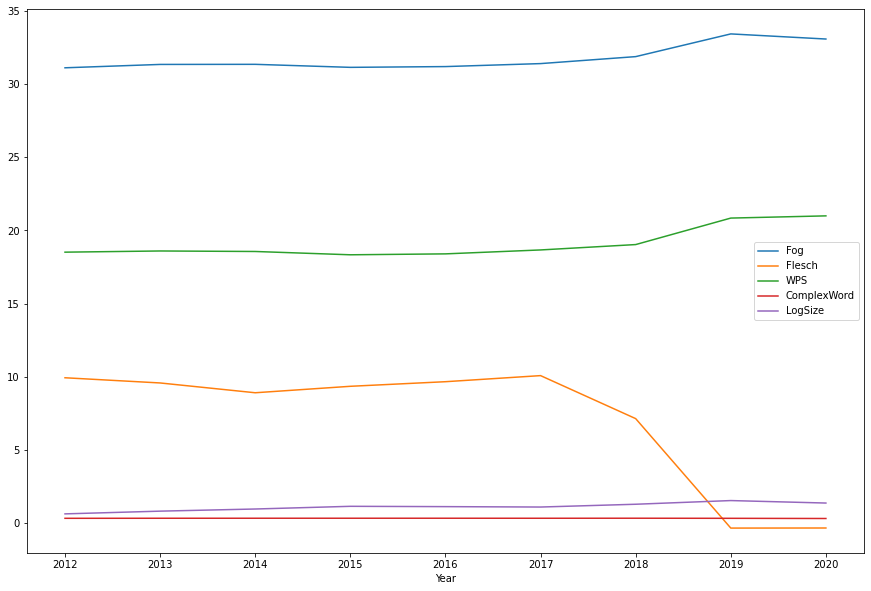

In [21]:
meandf = df[['Year','Fog','Flesch','WPS','ComplexWord','LogSize']].groupby('Year').mean()
meandf.plot(figsize=(15,10))

<AxesSubplot:xlabel='Year'>

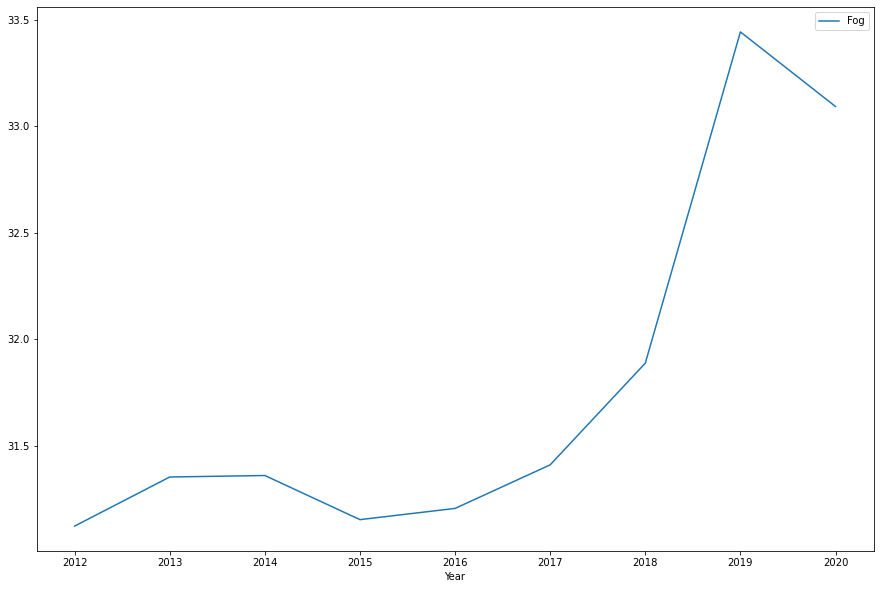

In [22]:
meandf = df[['Year','Fog']].groupby('Year').mean()
meandf.plot(figsize=(15,10))

<AxesSubplot:xlabel='Year'>

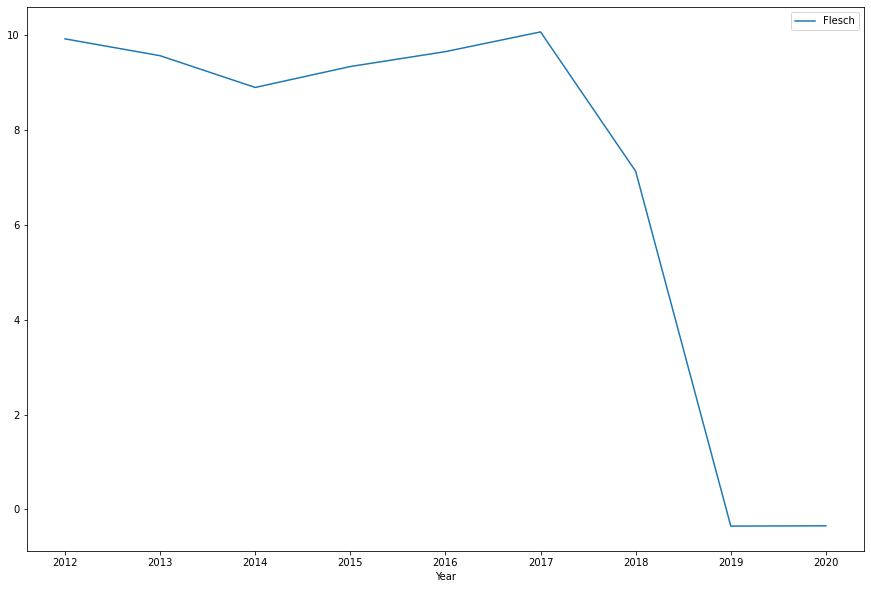

In [23]:
meandf = df[['Year', 'Flesch' ]].groupby('Year').mean()
meandf.plot(figsize=(15,10))

<AxesSubplot:xlabel='Year'>

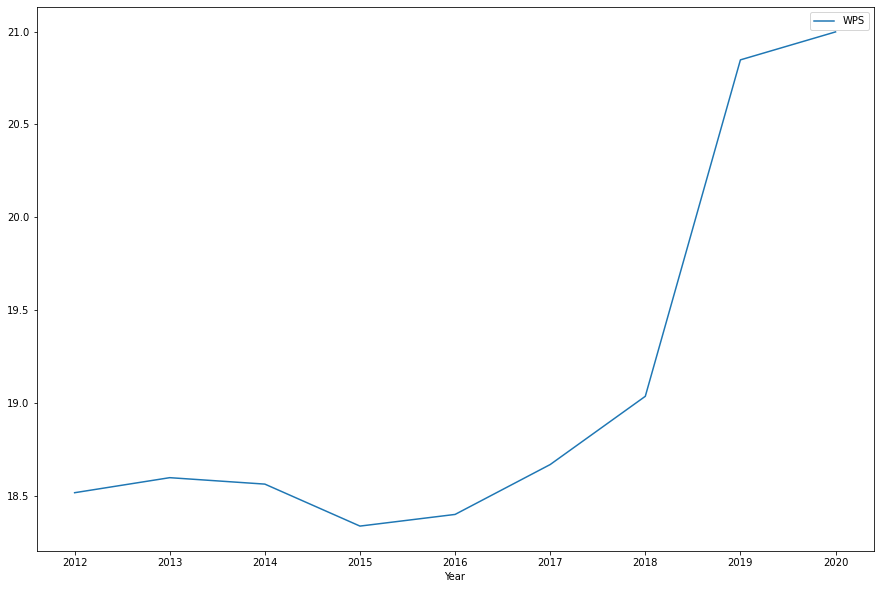

In [24]:
meandf = df[['Year','WPS']].groupby('Year').mean()
meandf.plot(figsize=(15,10))

<AxesSubplot:xlabel='Year'>

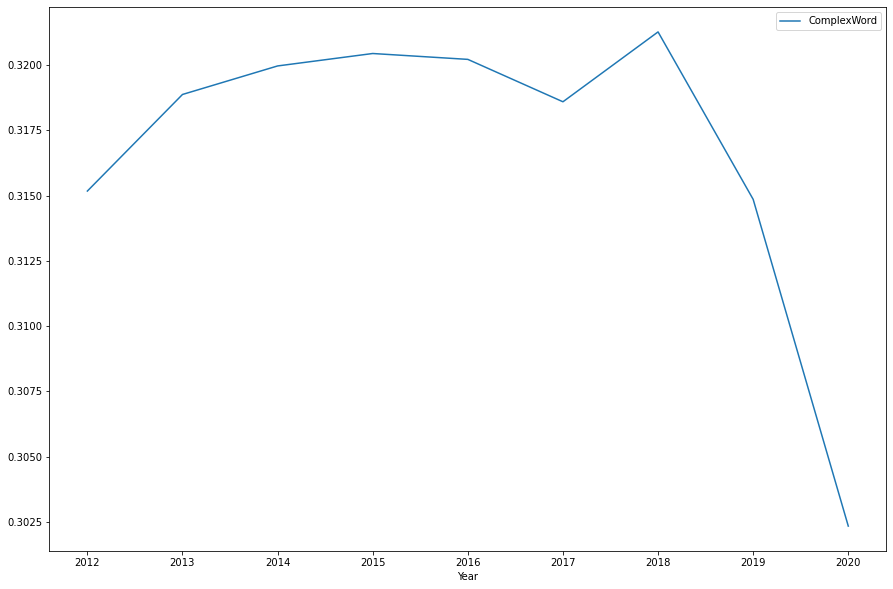

In [25]:
meandf = df[['Year', 'ComplexWord' ]].groupby('Year').mean()
meandf.plot(figsize=(15,10))

<AxesSubplot:xlabel='Year'>

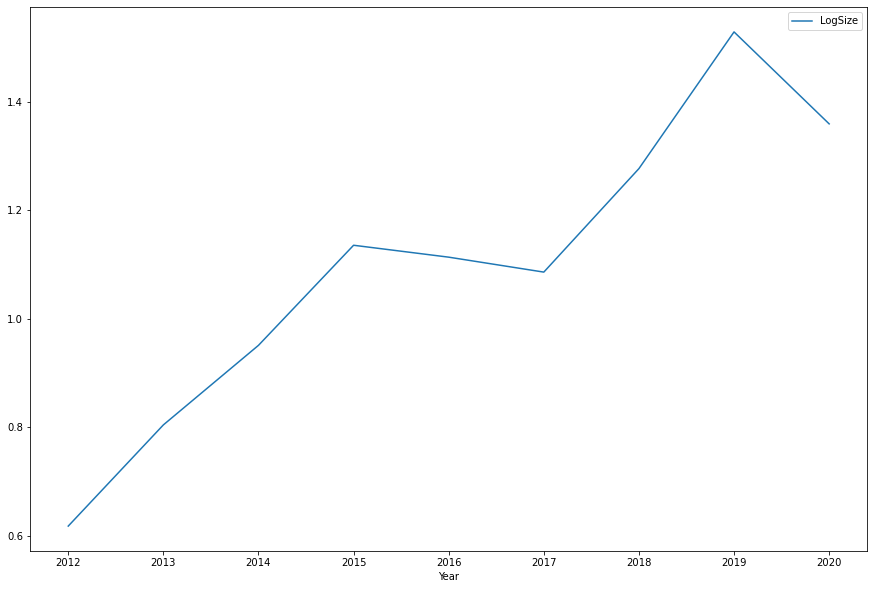

In [26]:
meandf = df[['Year', 'LogSize']].groupby('Year').mean()
meandf.plot(figsize=(15,10))

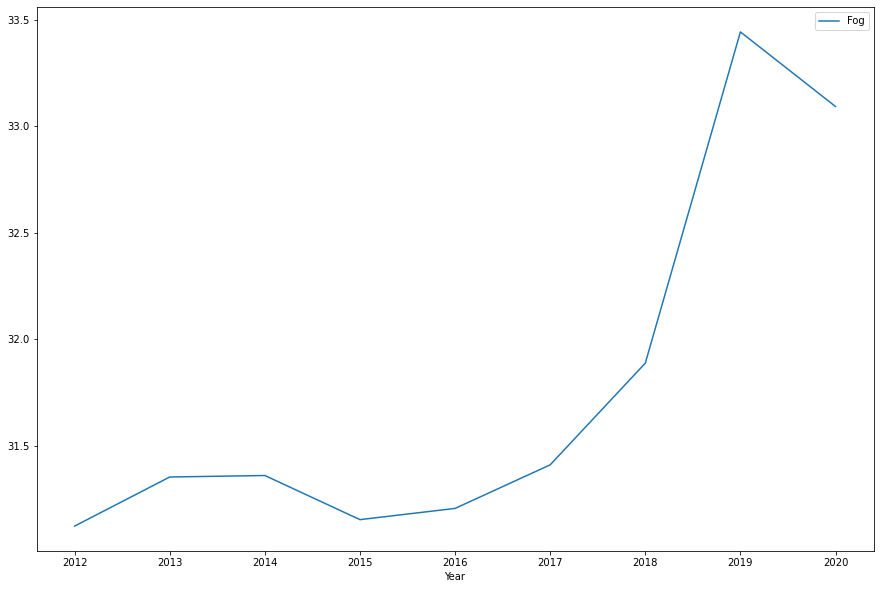

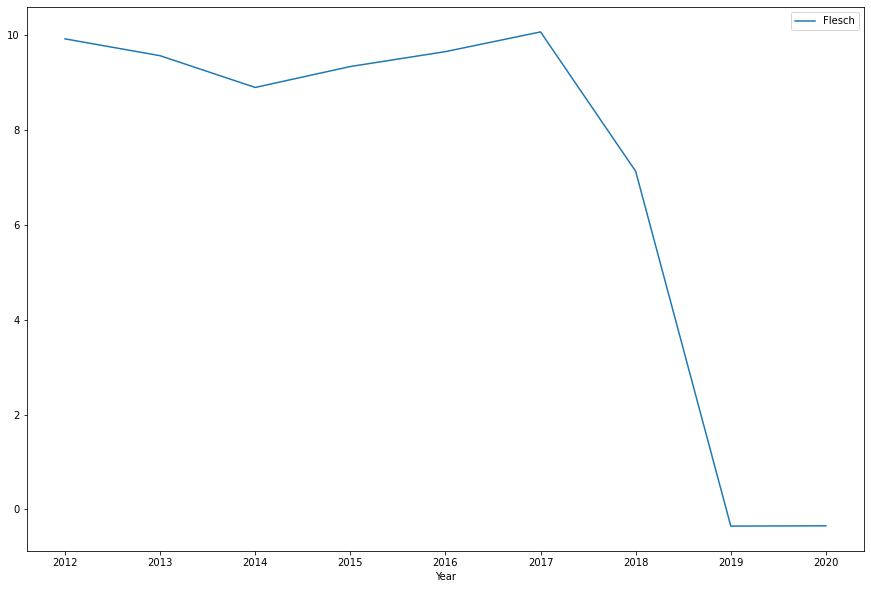

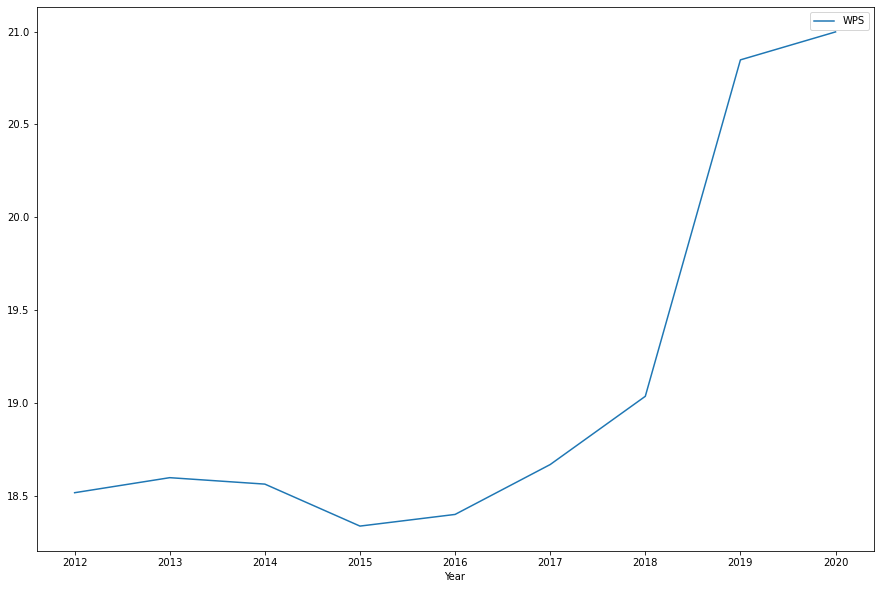

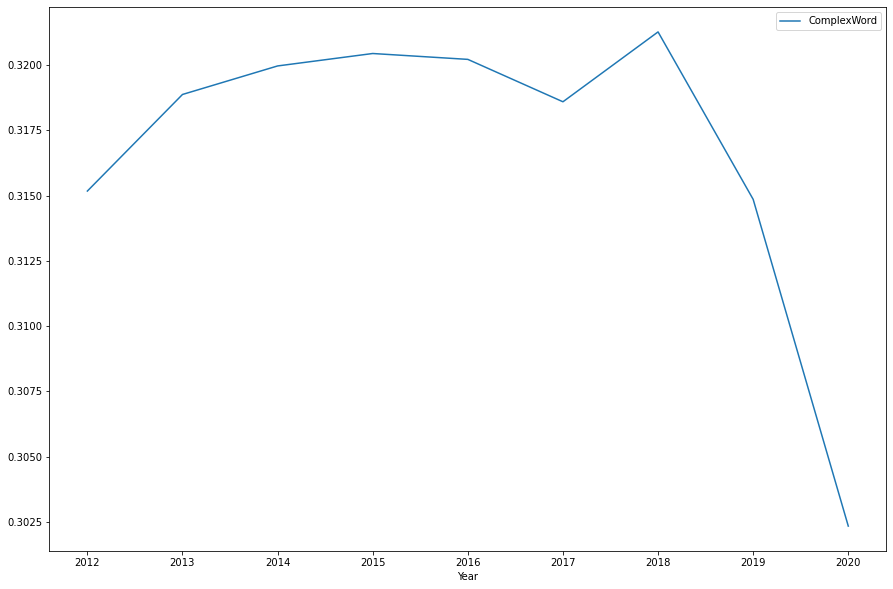

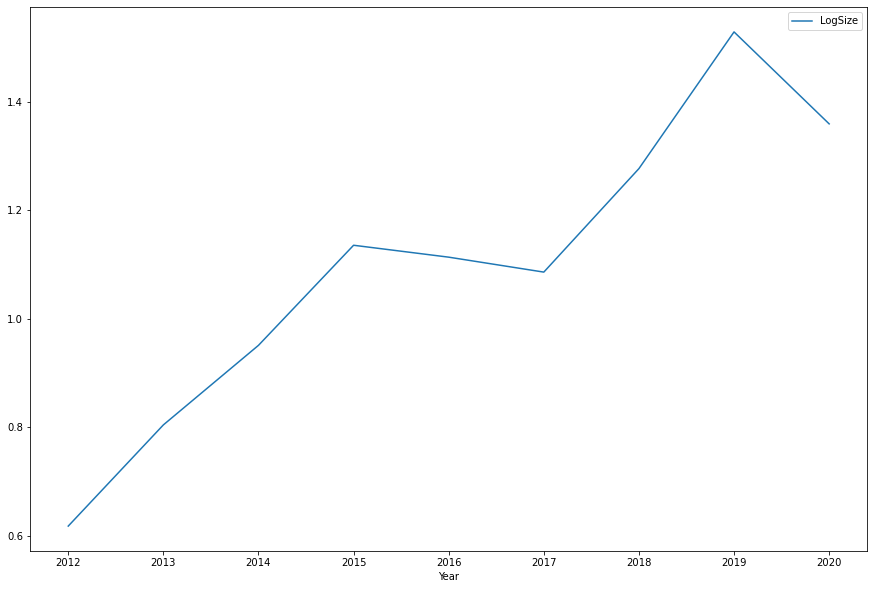

In [27]:
for col in ['Fog','Flesch','WPS','ComplexWord','LogSize']:
    meandf = df[['Year', col]].groupby('Year').mean()
    meandf.plot(figsize=(15,10)).figure.savefig(col+'.png')

In [28]:
len(df['Name'].unique())

95

In [29]:
df.shape

(737, 13)